### Hilbert DDPM for 1D toy example

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from util import get_V_and_A,get_x_0_for_1D_DDPM,gp_sampler,np2torch, get_x_0_for_quadratic_DDPM
from ddpm import get_ddpm_constants,plot_ddpm_constants,ddpm_train_wrapper
from model import DenoisingDenseUNetClass
np.set_printoptions(precision=2)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rc('xtick',labelsize=5); plt.rc('ytick',labelsize=5)
print ("Ready.")

Ready.


### Diffusion constants

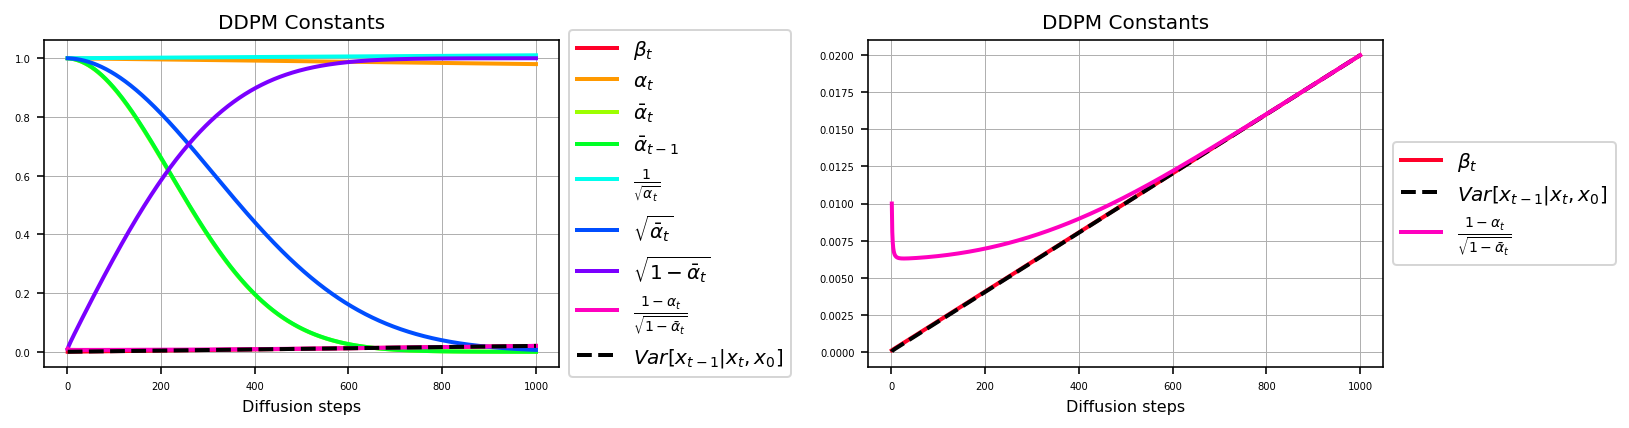

In [2]:
# Smaller `beta_end` tends to show better performances
dc = get_ddpm_constants(beta_start=1e-4,beta_end=2e-2,diffusion_step=1000)
plot_ddpm_constants(dc,figsize=(12,3))

### Commmon hyper-parameters

In [3]:
BATCH_SIZE,D,L = 128,1,100
base_lr,MAX_ITER = 1e-4,50000
actv = nn.ReLU() # nn.GELU(), nn.ReLU()
l1_w,l2_w,huber_w,smt_l1_w = 1.0,1.0,0.0,0.0
device = 'cpu' # cpu / mps
print ("Ready.")

Ready.


### Training data

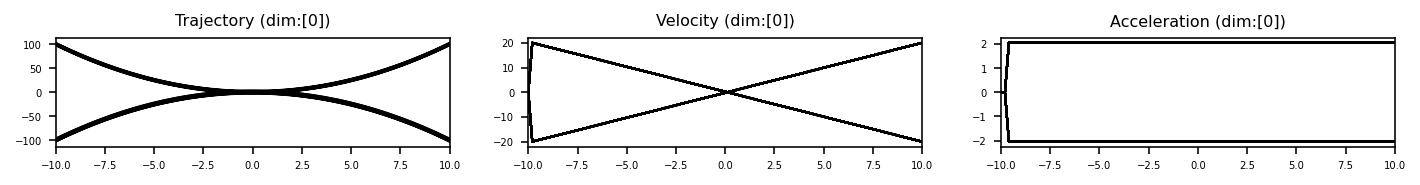

Ready.


In [7]:
times = np.linspace(start=-10.0,stop=10.0,num=L).reshape((-1,1)) # [L x 1]
# x_0,V,A = get_x_0_for_1D_DDPM(times,D=1,M=10,USE_SINGLE_TRAJECTORY=False,device='cpu')
x_0,V,A = get_x_0_for_quadratic_DDPM(times,D=1,M=256,USE_SINGLE_TRAJECTORY=False,device='cpu')
print ("Ready.")

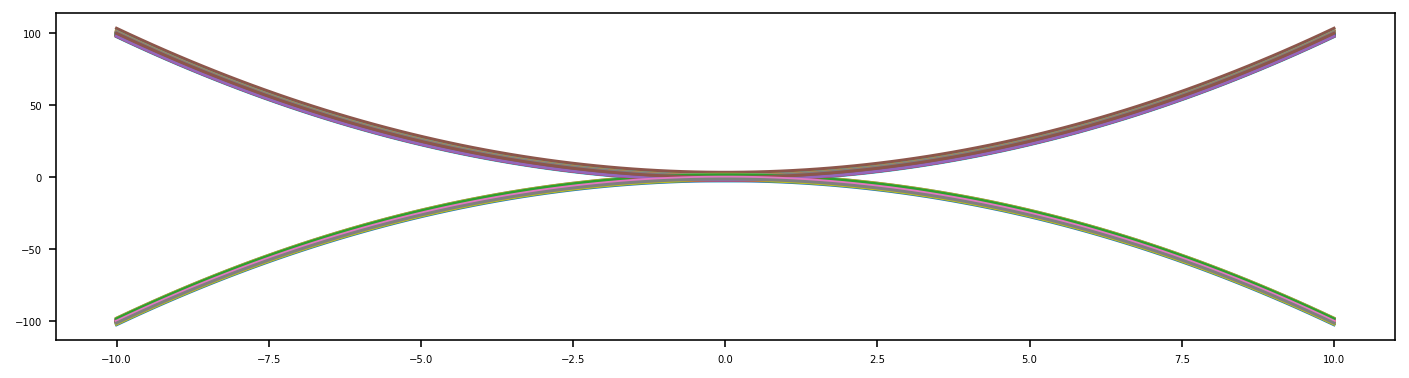

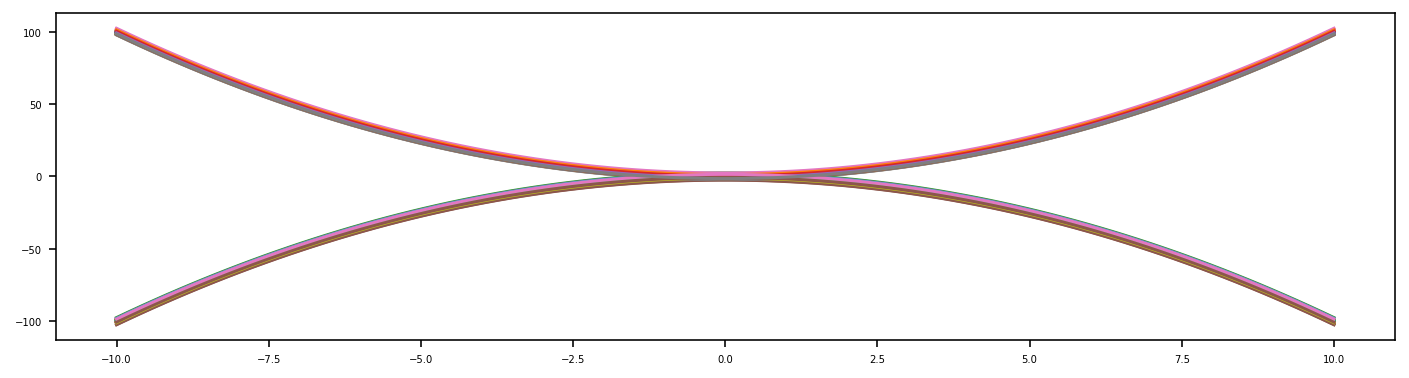

In [5]:
x_train, x_val = x_0[:128], x_0[128:]

times = np.linspace(-10, 10, 100)
plt.figure(figsize=(12,3))

for i in range(BATCH_SIZE):
    plt.plot(times,x_train[i,0,:],label='x_train')
# plt.plot(times,x_val[0,:],label='x_val[0]')
    # plt.legend()
plt.show()

plt.figure(figsize=(12,3))

for i in range(BATCH_SIZE):
    plt.plot(times,x_val[i,0,:],label='x_val')
    # plt.legend()
plt.show()


### Diffusion DDPM 

torch.Size([128, 1, 100]) torch.Size([128, 1, 100]) torch.Size([256, 1, 100])
[0/50000][0.00%] train loss:[3.172]
  [l1]:[1.125]
  [l2]:[2.046]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[0/50000][0.00%] valid loss:[3.404]
  [l1]:[1.086]
  [l2]:[2.318]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]


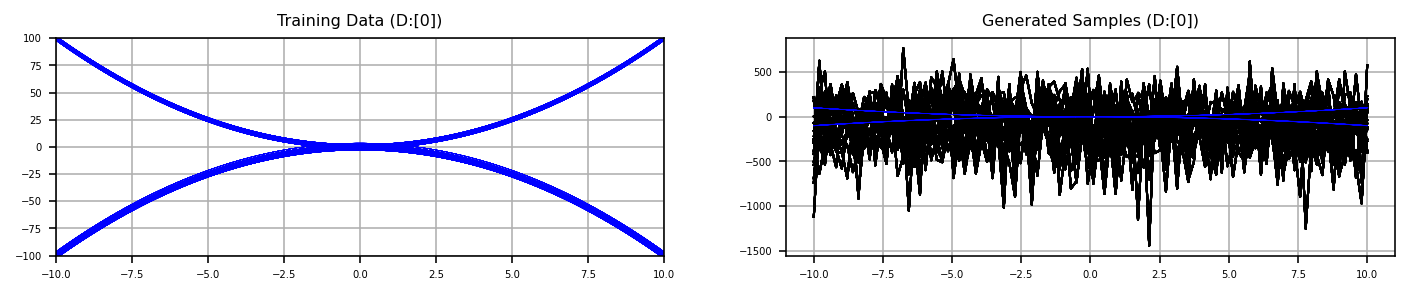

[2500/50000][5.00%] train loss:[0.817]
  [l1]:[0.459]
  [l2]:[0.357]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[2500/50000][5.00%] valid loss:[0.824]
  [l1]:[0.460]
  [l2]:[0.364]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/50000][10.00%] train loss:[0.508]
  [l1]:[0.310]
  [l2]:[0.197]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[5000/50000][10.00%] valid loss:[0.495]
  [l1]:[0.302]
  [l2]:[0.192]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]


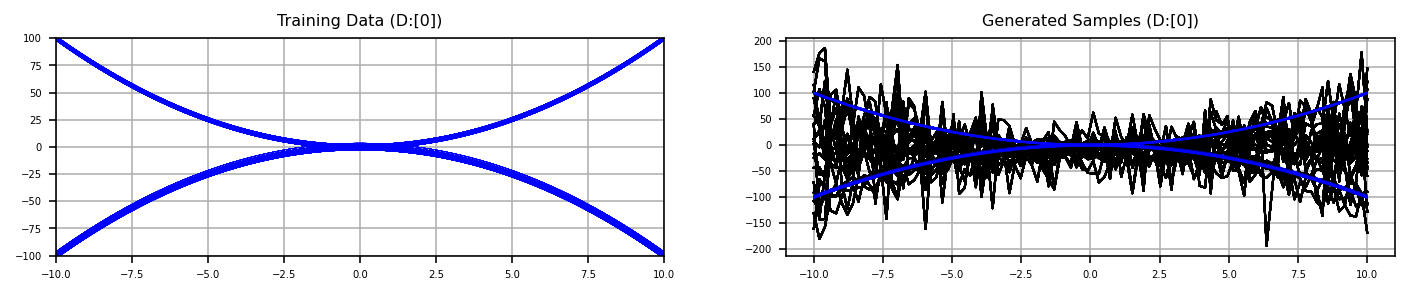

[7500/50000][15.00%] train loss:[0.400]
  [l1]:[0.256]
  [l2]:[0.143]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[7500/50000][15.00%] valid loss:[0.374]
  [l1]:[0.238]
  [l2]:[0.134]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[10000/50000][20.00%] train loss:[0.420]
  [l1]:[0.264]
  [l2]:[0.155]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[10000/50000][20.00%] valid loss:[0.749]
  [l1]:[0.284]
  [l2]:[0.464]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]


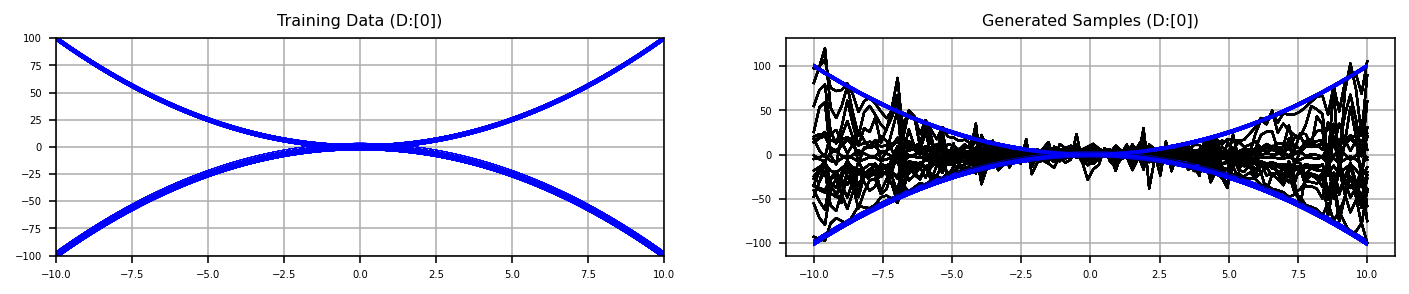

[12500/50000][25.00%] train loss:[0.405]
  [l1]:[0.248]
  [l2]:[0.156]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[12500/50000][25.00%] valid loss:[0.384]
  [l1]:[0.233]
  [l2]:[0.150]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[15000/50000][30.00%] train loss:[0.423]
  [l1]:[0.262]
  [l2]:[0.161]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[15000/50000][30.00%] valid loss:[7.646]
  [l1]:[0.408]
  [l2]:[7.233]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.004]


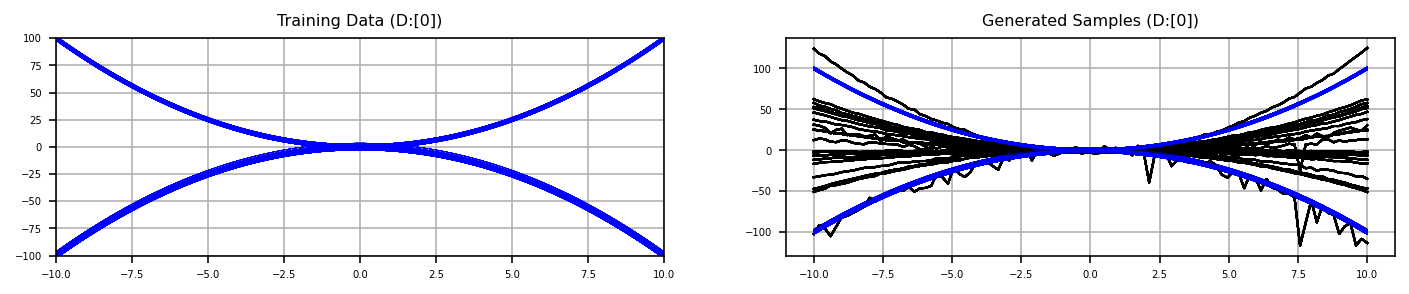

[17500/50000][35.00%] train loss:[0.356]
  [l1]:[0.230]
  [l2]:[0.125]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[17500/50000][35.00%] valid loss:[53.105]
  [l1]:[0.579]
  [l2]:[52.499]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.026]
[20000/50000][40.00%] train loss:[0.349]
  [l1]:[0.227]
  [l2]:[0.121]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[20000/50000][40.00%] valid loss:[2.458]
  [l1]:[0.272]
  [l2]:[2.184]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.002]


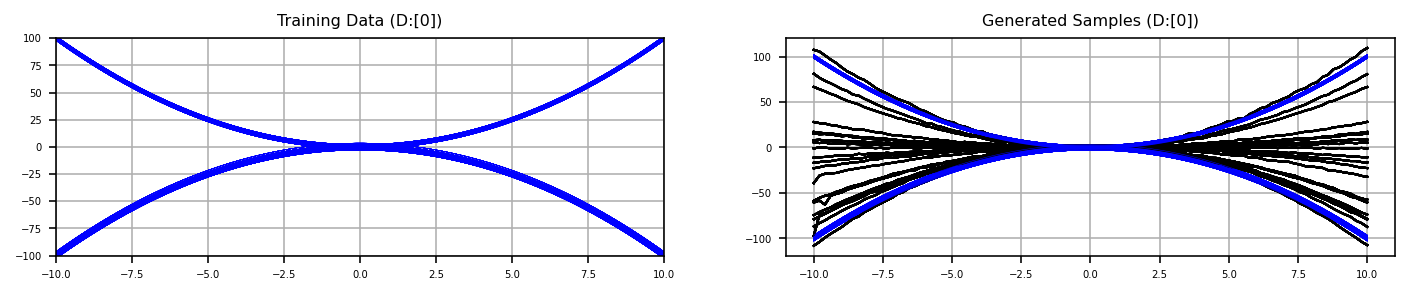

[22500/50000][45.00%] train loss:[0.372]
  [l1]:[0.233]
  [l2]:[0.138]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[22500/50000][45.00%] valid loss:[379.048]
  [l1]:[1.151]
  [l2]:[377.715]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.003]
  [acc]:[0.180]
[25000/50000][50.00%] train loss:[0.359]
  [l1]:[0.229]
  [l2]:[0.129]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[25000/50000][50.00%] valid loss:[0.331]
  [l1]:[0.208]
  [l2]:[0.122]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]


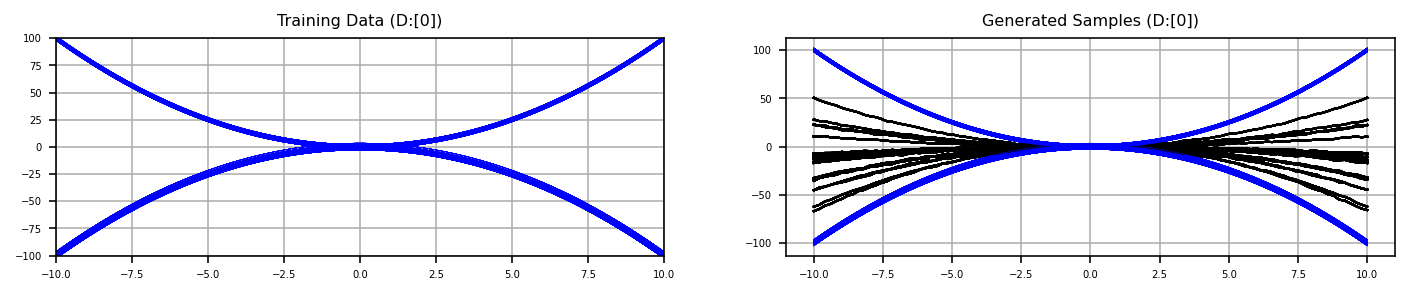

[27500/50000][55.00%] train loss:[0.331]
  [l1]:[0.217]
  [l2]:[0.113]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[27500/50000][55.00%] valid loss:[0.296]
  [l1]:[0.191]
  [l2]:[0.104]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[30000/50000][60.00%] train loss:[0.413]
  [l1]:[0.251]
  [l2]:[0.161]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[30000/50000][60.00%] valid loss:[19.202]
  [l1]:[0.523]
  [l2]:[18.671]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.009]


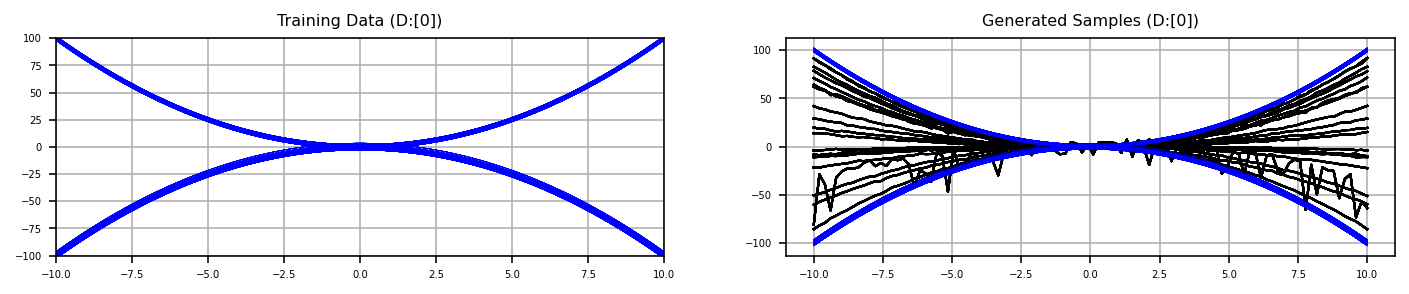

[32500/50000][65.00%] train loss:[0.397]
  [l1]:[0.251]
  [l2]:[0.145]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[32500/50000][65.00%] valid loss:[468.407]
  [l1]:[1.296]
  [l2]:[466.923]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.003]
  [acc]:[0.185]
[35000/50000][70.00%] train loss:[0.353]
  [l1]:[0.224]
  [l2]:[0.128]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[35000/50000][70.00%] valid loss:[0.399]
  [l1]:[0.213]
  [l2]:[0.185]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]


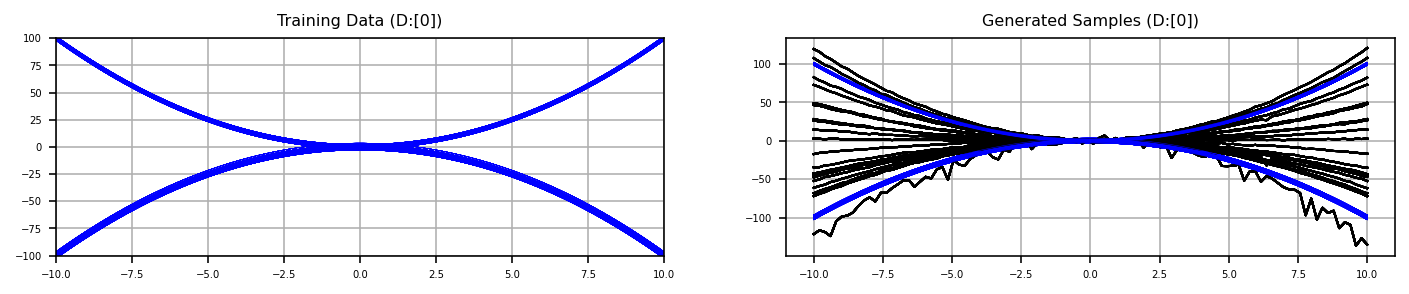

[37500/50000][75.00%] train loss:[0.437]
  [l1]:[0.268]
  [l2]:[0.168]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[37500/50000][75.00%] valid loss:[126039.844]
  [l1]:[24.488]
  [l2]:[125956.141]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.788]
  [acc]:[58.419]
[40000/50000][80.00%] train loss:[0.392]
  [l1]:[0.239]
  [l2]:[0.152]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[40000/50000][80.00%] valid loss:[0.464]
  [l1]:[0.239]
  [l2]:[0.224]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]


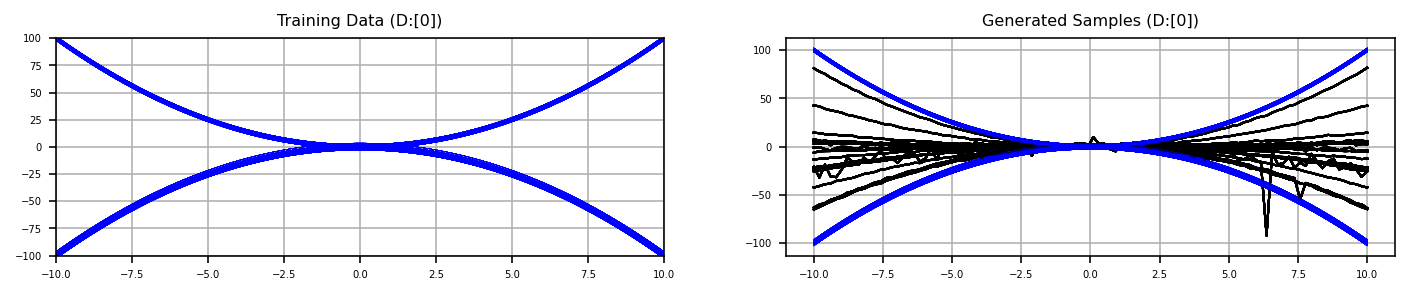

[42500/50000][85.00%] train loss:[0.430]
  [l1]:[0.263]
  [l2]:[0.166]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[42500/50000][85.00%] valid loss:[0.378]
  [l1]:[0.232]
  [l2]:[0.145]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[45000/50000][90.00%] train loss:[0.352]
  [l1]:[0.222]
  [l2]:[0.129]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[45000/50000][90.00%] valid loss:[137.128]
  [l1]:[0.917]
  [l2]:[136.144]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.001]
  [acc]:[0.066]


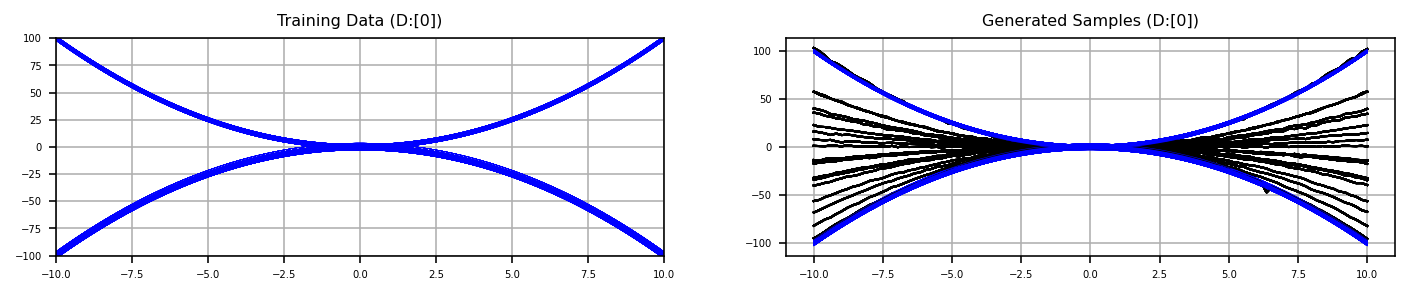

[47500/50000][95.00%] train loss:[0.361]
  [l1]:[0.229]
  [l2]:[0.131]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[47500/50000][95.00%] valid loss:[0.996]
  [l1]:[0.249]
  [l2]:[0.746]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[49999/50000][100.00%] train loss:[0.345]
  [l1]:[0.223]
  [l2]:[0.122]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]
[49999/50000][100.00%] valid loss:[0.308]
  [l1]:[0.199]
  [l2]:[0.107]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.001]


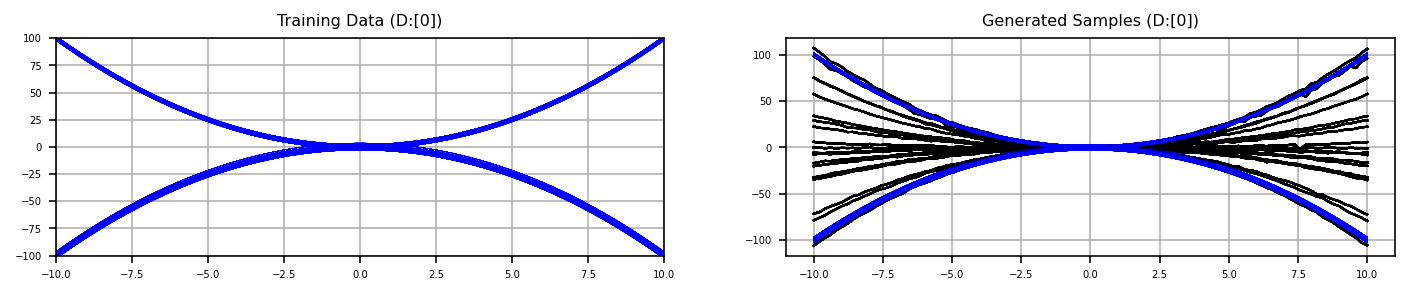

Done.


In [8]:
train_losses, valid_losses = ddpm_train_wrapper(
    times,x_0,dc,actv=actv,
    hyp_len_forward=0.1,hyp_len_projection=0.1,hyp_sig2w=1e-6,
    n_sample=20,base_lr=base_lr,MAX_ITER=MAX_ITER,BATCH_SIZE=BATCH_SIZE,
    l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
    A=A,V=V,vel_w=1e-6,acc_w=1e-6,
    RKHS_PROJECTION_EACH_X_T=True,device='cpu')
print ("Done.")

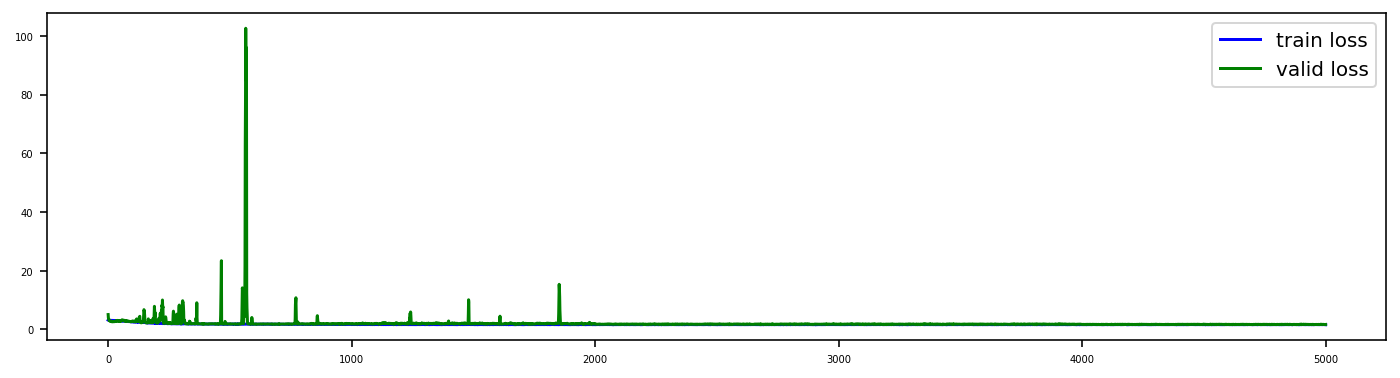

In [6]:
x_range = np.arange(0, 5000, 1)

plt.figure(figsize=(12,3))
plt.plot(x_range, train_losses, c='b', label='train loss')
plt.plot(x_range, valid_losses, c='g', label='valid loss')
plt.legend()
plt.show()

### Baseline

[0/50000][0.00%] loss:[3.071]
  [l1]:[1.095]
  [l2]:[1.976]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


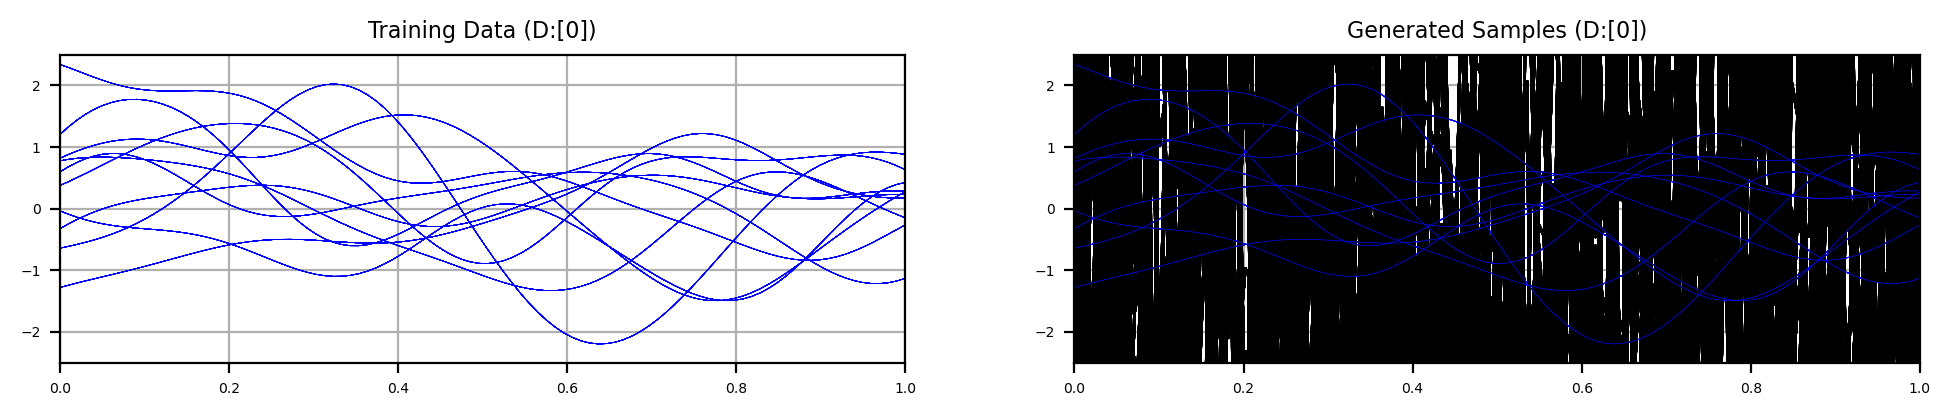

[2500/50000][5.00%] loss:[0.471]
  [l1]:[0.287]
  [l2]:[0.185]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/50000][10.00%] loss:[0.440]
  [l1]:[0.271]
  [l2]:[0.169]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


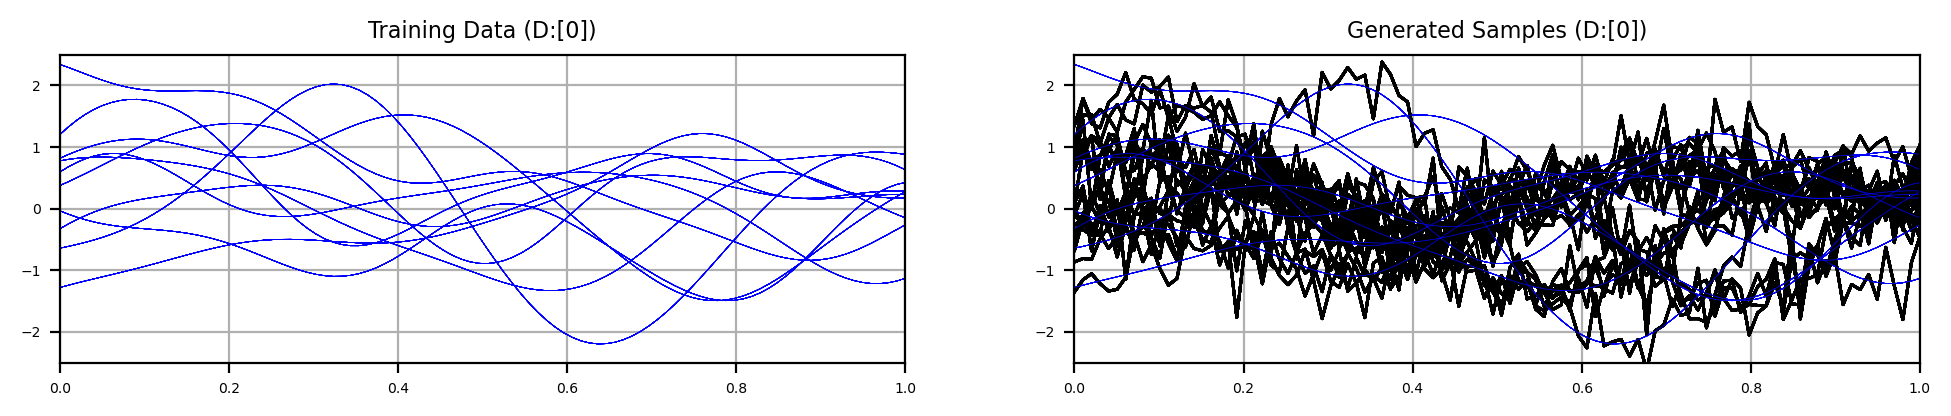

[7500/50000][15.00%] loss:[0.480]
  [l1]:[0.293]
  [l2]:[0.186]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[10000/50000][20.00%] loss:[0.486]
  [l1]:[0.294]
  [l2]:[0.192]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


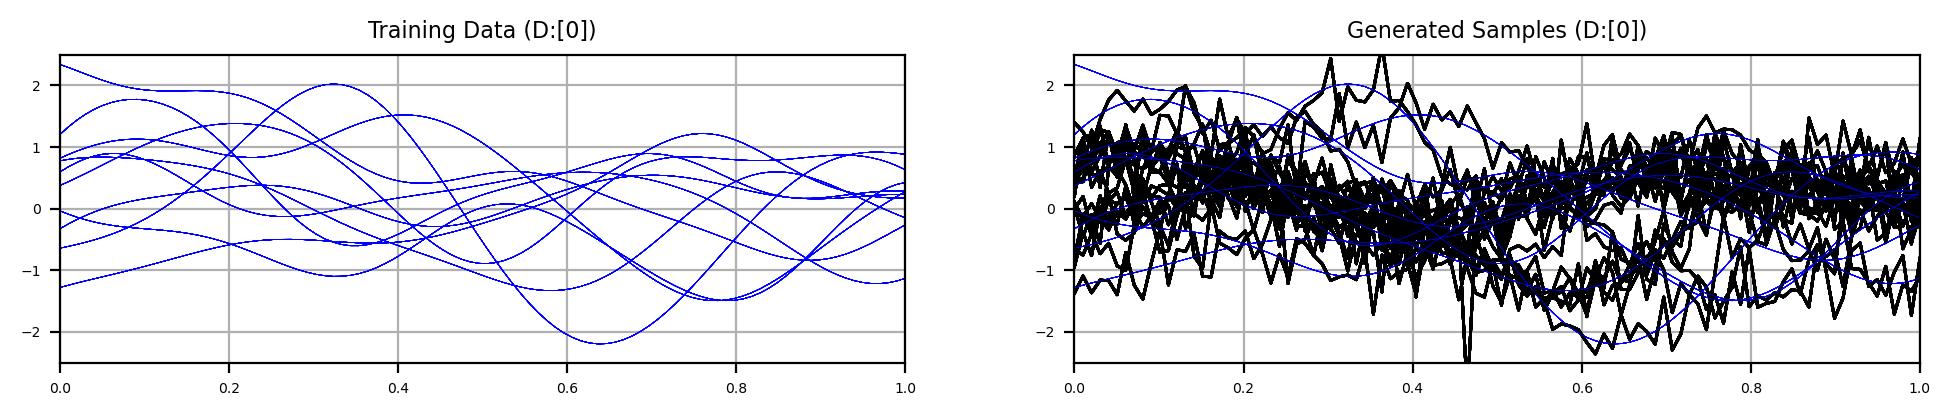

[12500/50000][25.00%] loss:[0.427]
  [l1]:[0.266]
  [l2]:[0.161]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[15000/50000][30.00%] loss:[0.470]
  [l1]:[0.282]
  [l2]:[0.188]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


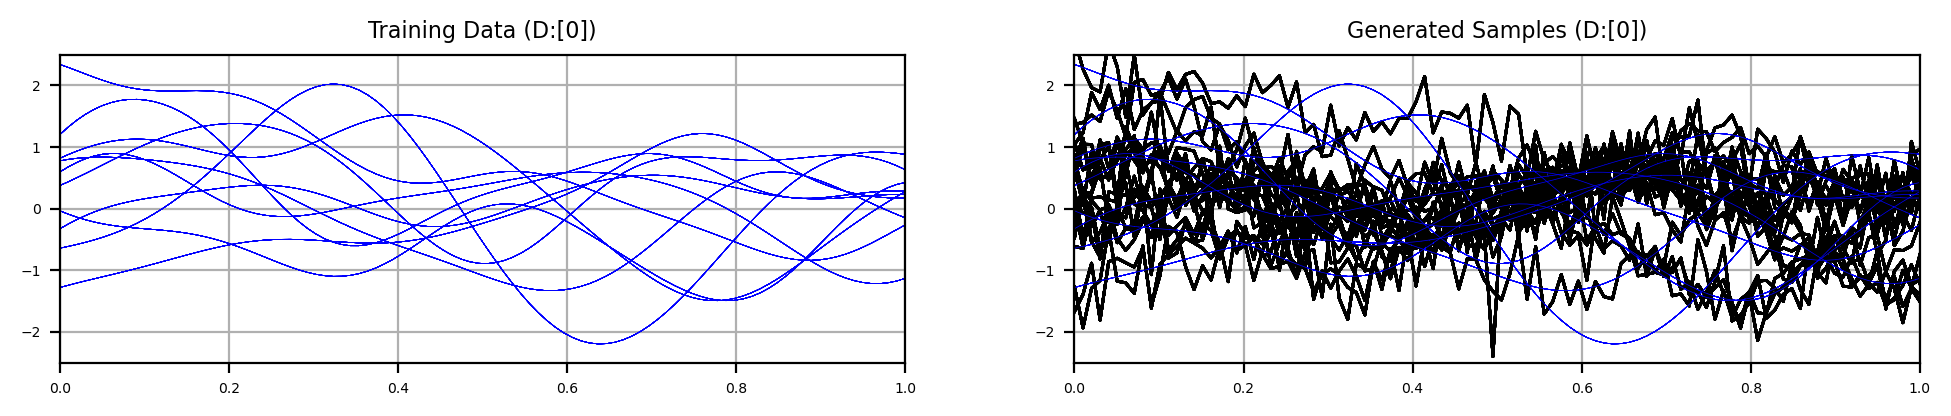

[17500/50000][35.00%] loss:[0.417]
  [l1]:[0.257]
  [l2]:[0.160]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[20000/50000][40.00%] loss:[0.531]
  [l1]:[0.316]
  [l2]:[0.215]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


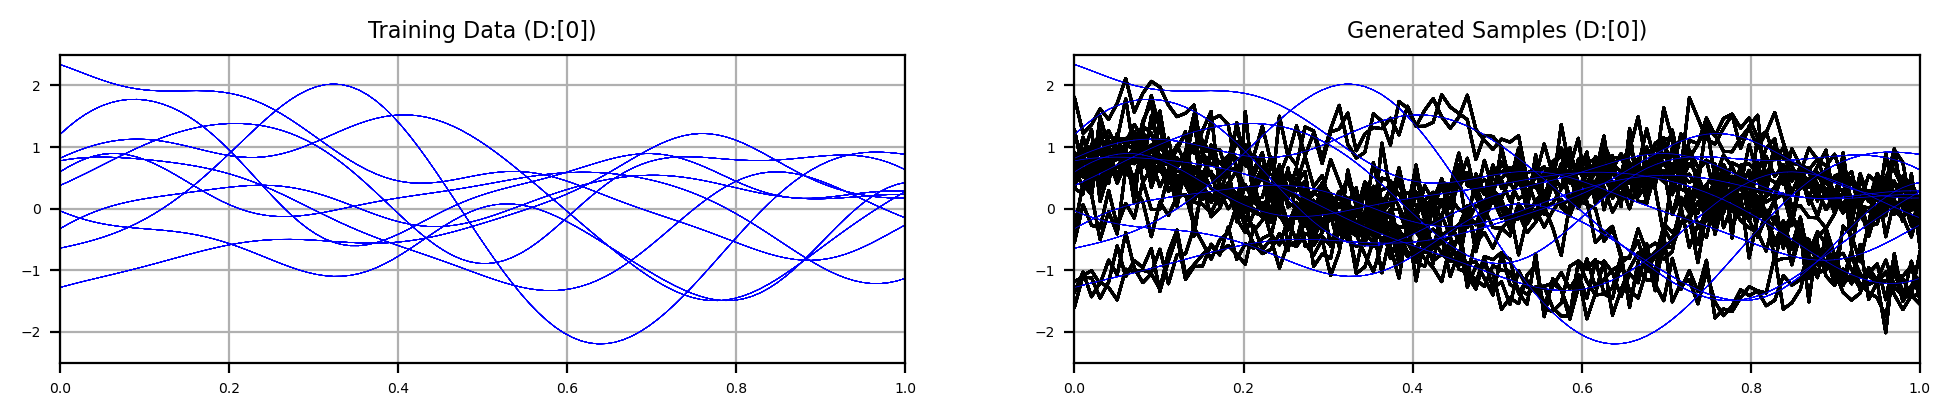

[22500/50000][45.00%] loss:[0.468]
  [l1]:[0.284]
  [l2]:[0.184]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[25000/50000][50.00%] loss:[0.417]
  [l1]:[0.264]
  [l2]:[0.153]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


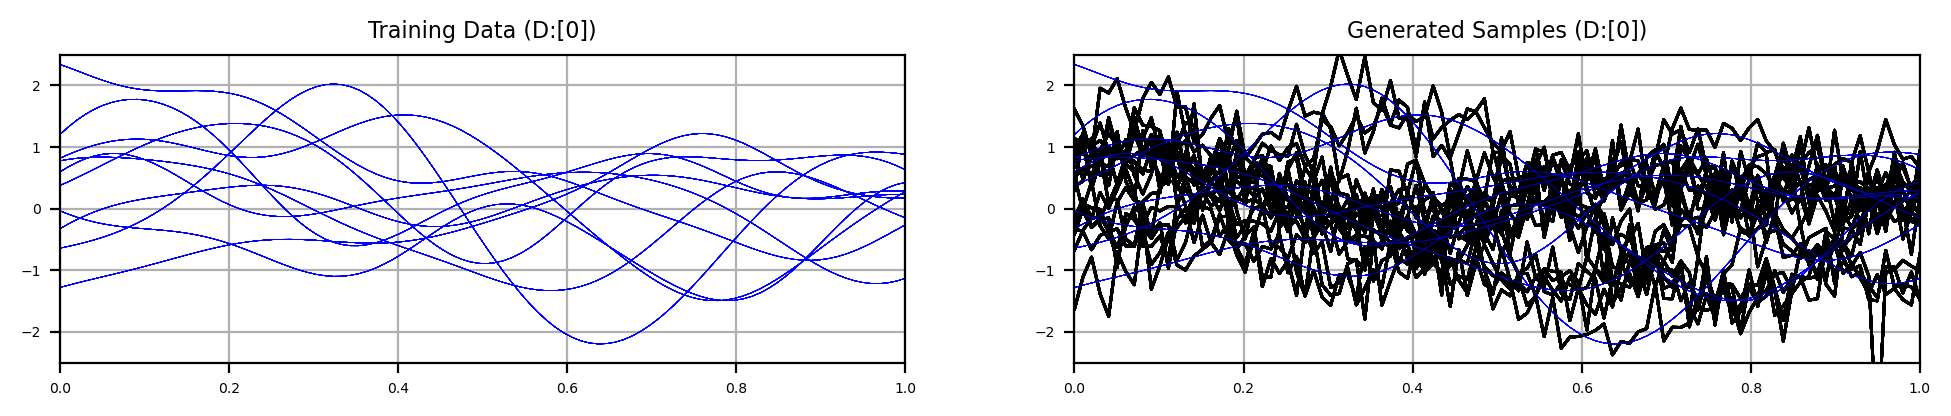

[27500/50000][55.00%] loss:[0.401]
  [l1]:[0.258]
  [l2]:[0.142]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[30000/50000][60.00%] loss:[0.433]
  [l1]:[0.268]
  [l2]:[0.165]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


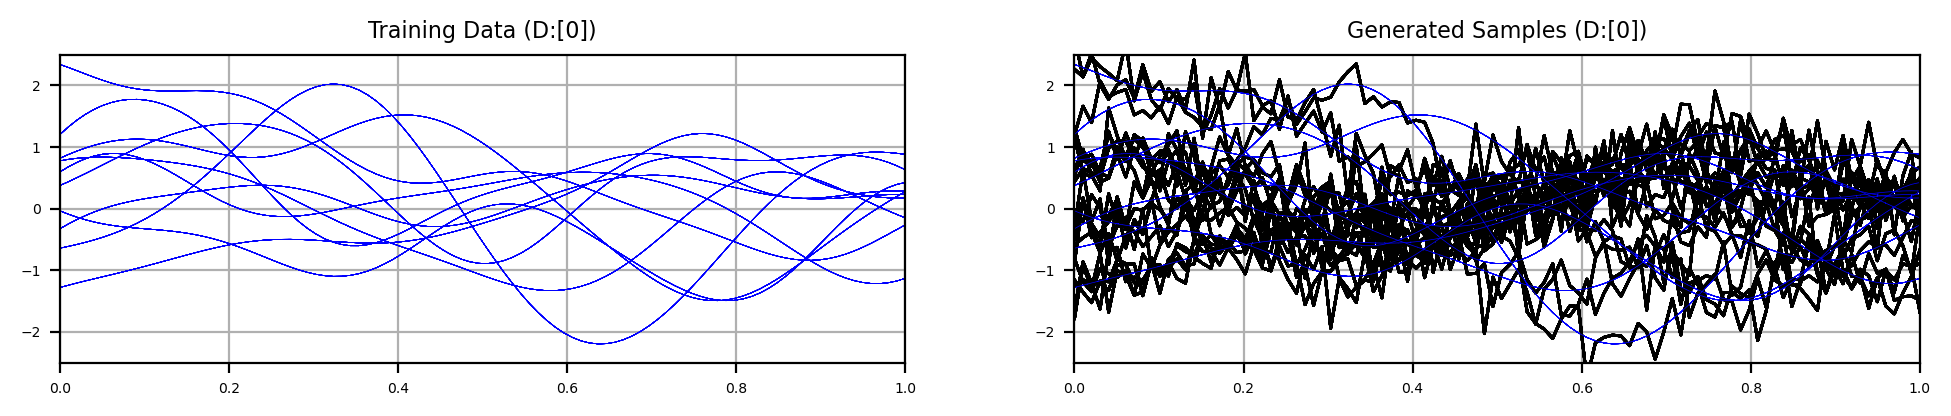

[32500/50000][65.00%] loss:[0.492]
  [l1]:[0.297]
  [l2]:[0.195]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[35000/50000][70.00%] loss:[0.477]
  [l1]:[0.286]
  [l2]:[0.190]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


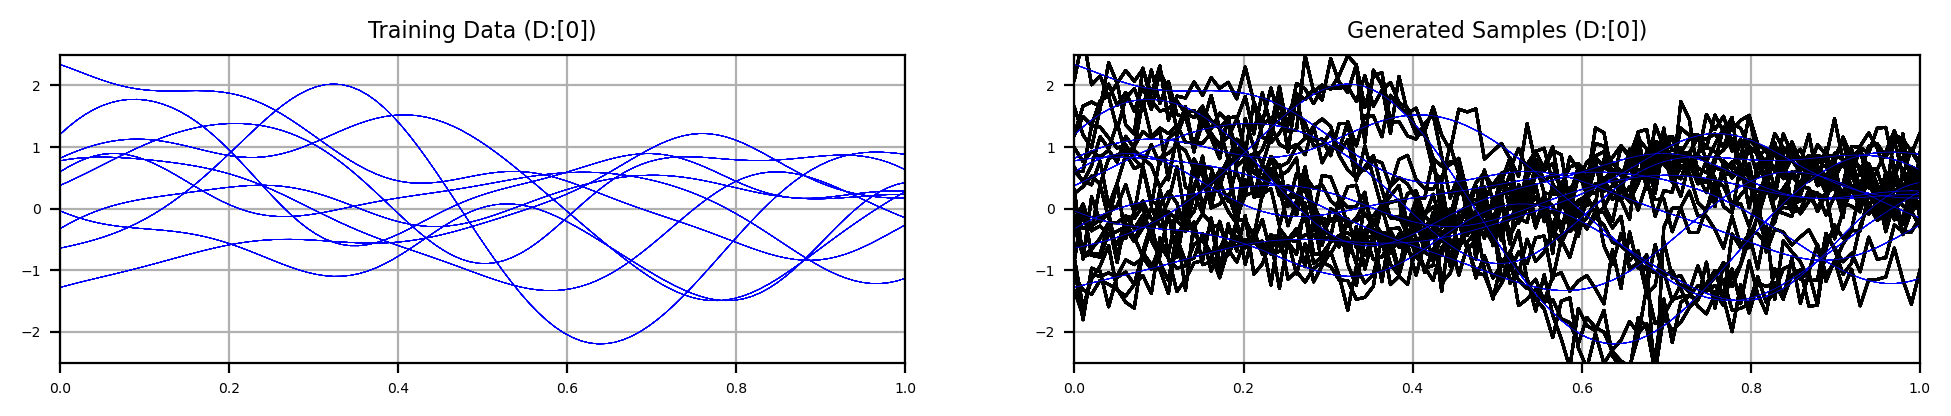

[37500/50000][75.00%] loss:[0.406]
  [l1]:[0.254]
  [l2]:[0.152]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[40000/50000][80.00%] loss:[0.438]
  [l1]:[0.270]
  [l2]:[0.168]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


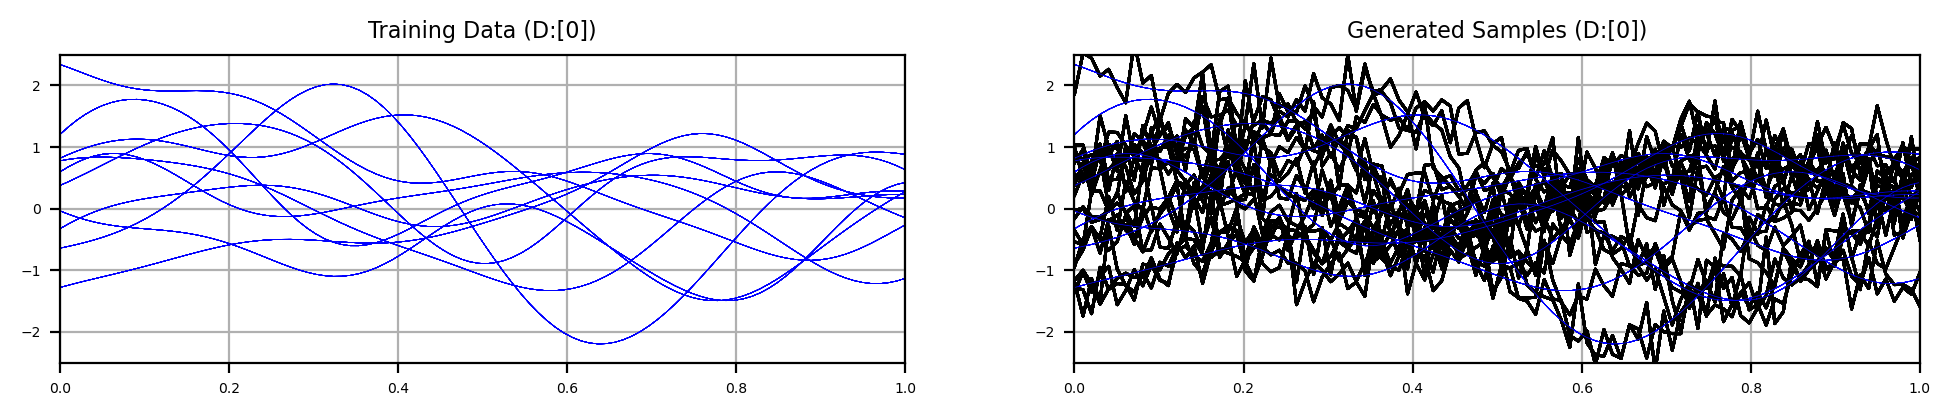

[42500/50000][85.00%] loss:[0.458]
  [l1]:[0.276]
  [l2]:[0.182]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[45000/50000][90.00%] loss:[0.473]
  [l1]:[0.289]
  [l2]:[0.184]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


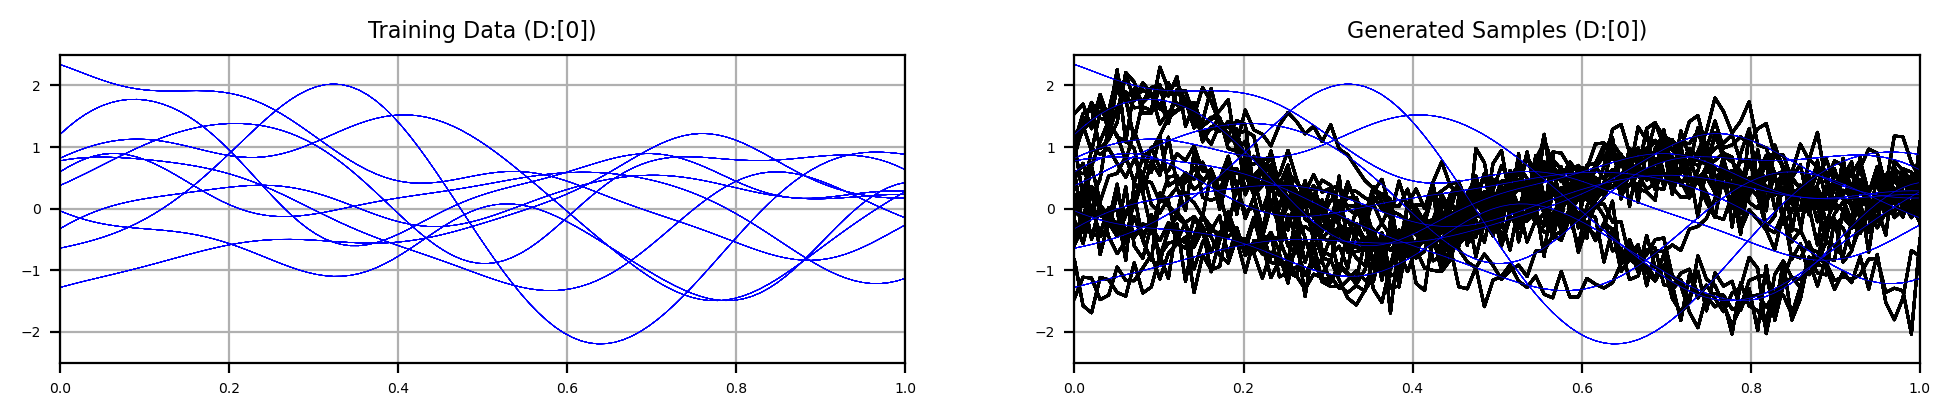

[47500/50000][95.00%] loss:[0.430]
  [l1]:[0.266]
  [l2]:[0.164]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[49999/50000][100.00%] loss:[0.436]
  [l1]:[0.271]
  [l2]:[0.165]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


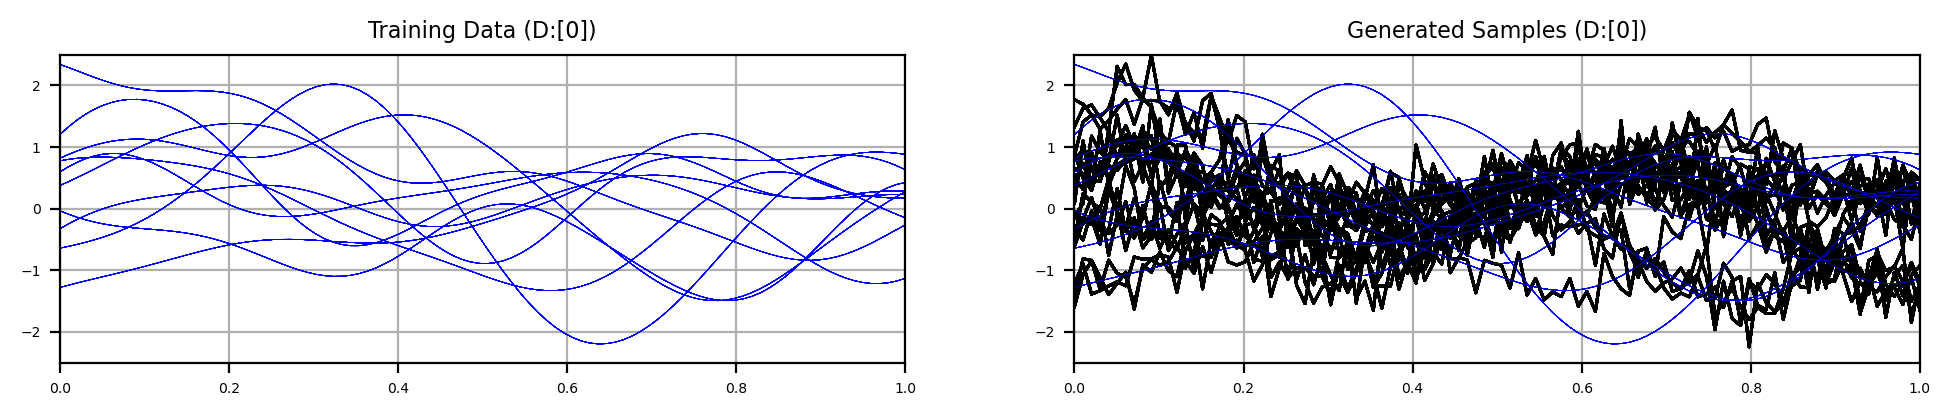

Done.


In [6]:
ddpm_train_wrapper(
    times,x_0,dc,actv=actv,
    hyp_len_forward=0.0,hyp_len_projection=0.0,hyp_sig2w=1e-6,
    n_sample=20,base_lr=base_lr,MAX_ITER=MAX_ITER,BATCH_SIZE=BATCH_SIZE,
    l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
    A=A,V=V,vel_w=0.0,acc_w=0.0,
    RKHS_PROJECTION_EACH_X_T=False,device='cpu')
print ("Done.")